<a href="https://colab.research.google.com/github/EchenimEdwin/https-github.com-users-EchenimEdwin-/blob/main/CNN_GRU_Hybrid_for_Pressure_Test_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 64)          │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100)            │        49,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,477 (197.18 KB)

 Trainable params: 50,477 (197.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6267 - loss: 0.6830 - val_accuracy: 0.6667 - val_loss: 0.6897
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6618 - loss: 0.6507 - val_accuracy: 0.0000e+00 - val_loss: 0.7540
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7759 - loss: 0.6222 - val_accuracy: 0.3333 - val_loss: 0.8357
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9077 - loss: 0.5282 - val_accuracy: 0.0000e+00 - val_loss: 0.8569
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7354 - loss: 0.5786 - val_accuracy: 0.3333 - val_loss: 0.9410
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8428 - loss: 0.4204 - val_accuracy: 0.0000e+00 - val_loss: 0.9924
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8327 - loss: 0.4509 - val_accuracy: 0.3333 - val_loss: 1.0710
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6850 - loss: 0.4634 - val_accuracy

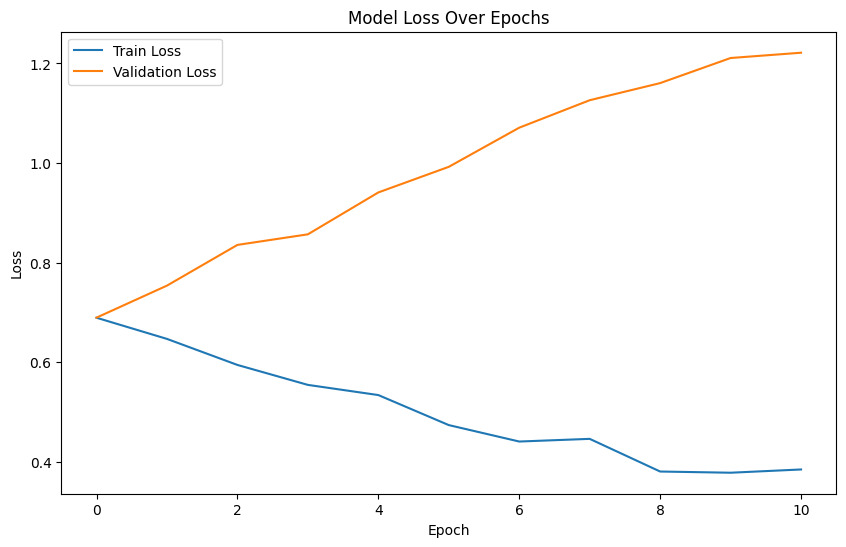

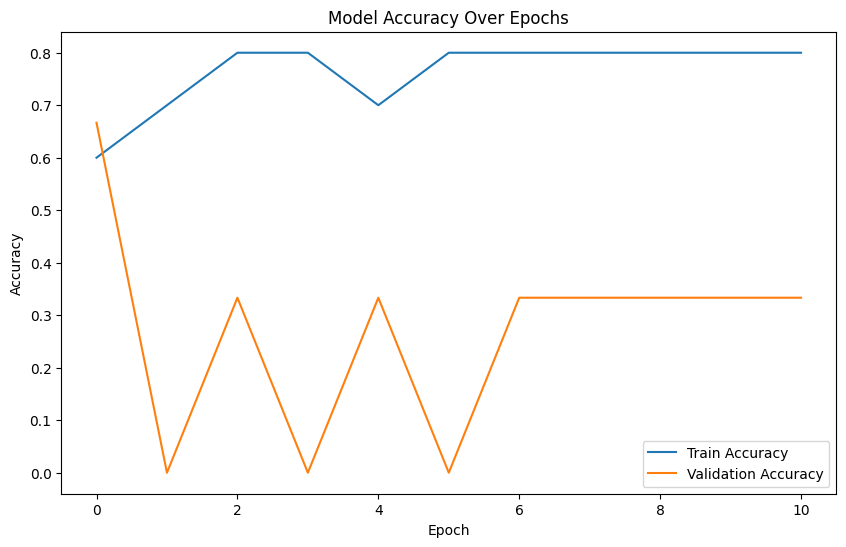

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
# Create a dummy CSV file for demonstration
csv_data = """timestamp,pressure_psi,temperature_c,flow_rate_m3_s,vibration_hz,anomaly
2025-01-01 00:00:00,1000.0,25.0,10.0,50.0,0
2025-01-01 00:01:00,1000.1,25.1,10.1,50.2,0
2025-01-01 00:02:00,1000.2,25.0,10.0,50.1,0
2025-01-01 00:03:00,999.9,25.2,10.2,50.3,0
2025-01-01 00:04:00,999.8,25.1,10.1,50.0,0
2025-01-01 00:05:00,999.7,25.0,10.0,50.2,0
2025-01-01 00:06:00,990.0,24.8,9.5,55.0,1
2025-01-01 00:07:00,980.5,24.5,9.0,60.1,1
2025-01-01 00:08:00,970.2,24.0,8.5,65.5,1
2025-01-01 00:09:00,960.1,23.5,8.0,70.0,1
2025-01-01 00:10:00,950.0,23.0,7.5,75.2,1
2025-01-01 00:11:00,950.1,23.1,7.6,74.9,1
2025-01-01 00:12:00,950.3,23.0,7.5,75.0,1
2025-01-01 00:13:00,950.2,23.2,7.7,75.1,1
2025-01-01 00:14:00,950.0,23.0,7.5,75.0,1
2025-01-01 00:15:00,950.5,23.3,7.8,75.5,1
2025-01-01 00:16:00,980.0,24.0,9.0,60.0,0
2025-01-01 00:17:00,990.1,24.5,9.5,55.0,0
2025-01-01 00:18:00,1000.0,25.0,10.0,50.0,0
2025-01-01 00:19:00,1000.2,25.1,10.1,50.1,0
"""
from io import StringIO
df = pd.read_csv(StringIO(csv_data))

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

# Features (X) and Target (y)
features = ['pressure_psi', 'temperature_c', 'flow_rate_m3_s', 'vibration_hz']
X = df[features].values
y = df['anomaly'].values

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Create sequences for time series
# A 'look_back' window determines how many past timesteps the model considers
look_back = 3 # e.g., use 3 past readings to predict/classify the current state

def create_sequences(data, labels, look_back):
    X_seq, y_seq = [], []
    for i in range(len(data) - look_back):
        X_seq.append(data[i:(i + look_back), :])
        y_seq.append(labels[i + look_back])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y, look_back)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq)

# Reshape input for CNN-GRU (samples, timesteps, features)
n_features = X_seq.shape[2]
X_train = X_train.reshape(X_train.shape[0], look_back, n_features)
X_test = X_test.reshape(X_test.shape[0], look_back, n_features)

# 2. Build the CNN-GRU Hybrid Model
model = Sequential([
    # CNN Layer for feature extraction
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, n_features)),
    Dropout(0.2),
    # GRU Layer for learning temporal dependencies
    GRU(units=100, return_sequences=False), # return_sequences=False for the last GRU layer
    Dropout(0.2),
    # Output layer
    Dense(units=1, activation='sigmoid') # Sigmoid for binary classification (anomaly or not)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# 3. Train the Model
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=1, # Small batch size for sequential data
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# 4. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 5. Make Predictions (Example)
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nSample Predictions vs. Actual:")
for i in range(min(5, len(y_test))):
    print(f"Actual: {y_test[i]}, Predicted Probability: {y_pred_proba[i][0]:.4f}, Predicted Class: {y_pred[i][0]}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()